In [ ]:
import cv2
import sys
import numpy as np
import math
from scipy.ndimage import filters
from pylab import *
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
import datetime
arr=np.zeros([5,5])
print(arr)
current_timestamp = datetime.datetime.now()
print("Current Timestamp:", current_timestamp)

[[0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]]
Current Timestamp: 2023-10-03 21:32:06.907460


In [ ]:
lenna=cv2.imread("D://uni/vis/labs/lenna.png")
cv2.imshow('lenna', lenna)
cv2.waitKey(0)
cv2.destroyAllWindows()

sys.exit()

SystemExit: 

C:\Users\Javeria Shahid\AppData\Roaming\Python\Python311\site-packages\IPython\core\interactiveshell.py:3513: UserWarning: To exit: use 'exit', 'quit', or Ctrl-D.
  warn("To exit: use 'exit', 'quit', or Ctrl-D.", stacklevel=1)


Current Timestamp: 2023-10-03 21:30:58.375505


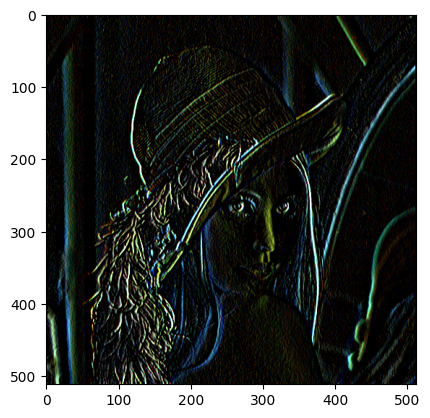

In [ ]:
#using sobel's for first order
sobels = np.array([[-1, 0, 1],[-2, 0, 2],[-1, 0, 1]])

firstOrder = cv2.filter2D(lenna, -1, sobels)

plt.imshow(firstOrder)
current_timestamp = datetime.datetime.now()
print("Current Timestamp:", current_timestamp)

Current Timestamp: 2023-10-03 21:31:49.569886


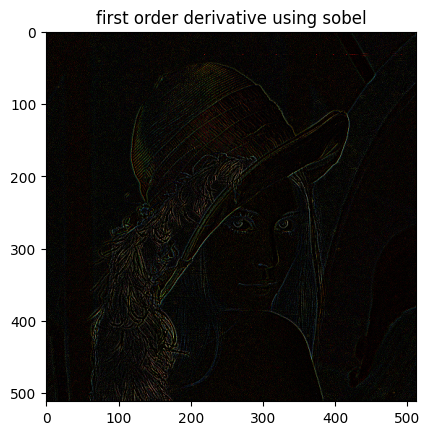

In [ ]:
#laplacian for second order
laplacian=np.array([[0,1,0],[1,-4,1],[0,1,0]])


laplacianfiltered = cv2.filter2D(lenna, -1, laplacian)

plt.imshow(laplacianfiltered)
plt.title('first order derivative using sobel')
current_timestamp = datetime.datetime.now()
print("Current Timestamp:", current_timestamp)

In [ ]:
#using simple standard deviation for a noise detection procedure


std_deviation = np.std(lenna)
threshold=10 #because google told me to put anywhere from 10-10000
if std_deviation < threshold:
    typeofnoise = "salt n pepper"
else:
    typeofnoise = "gaussian"

print("type ", typeofnoise)


current_timestamp = datetime.datetime.now()
print("Current Timestamp:", current_timestamp)

type  gaussian
Current Timestamp: 2023-10-03 21:31:44.229929


In [ ]:
reversedlenna = cv2.GaussianBlur(lenna, (5, 5), 0)  # You can adjust the kernel size (5, 5) as needed
cv2.imshow( 'fixed lenna ', reversedlenna)
cv2.waitKey(0)
cv2.destroyAllWindows()

sys.exit()


SystemExit: 

C:\Users\Javeria Shahid\AppData\Roaming\Python\Python311\site-packages\IPython\core\interactiveshell.py:3513: UserWarning: To exit: use 'exit', 'quit', or Ctrl-D.
  warn("To exit: use 'exit', 'quit', or Ctrl-D.", stacklevel=1)


In [ ]:


np.random.seed(0)
Xaxis = np.random.rand(10000, 2)  # 10000 samples with 2 features idk i just thought
Yaxis = (Xaxis[:, 0] + Xaxis[:, 1] > 1).astype(int)
Xtrain, Xtest, Ytrain, Ytest = train_test_split(Xaxis, Yaxis, test_size=0.5, random_state=42)


model = LogisticRegression()
model.fit(Xtrain, Ytrain)
yp = model.predict(Xtest)

accuracy = accuracy_score(Ytest, yp)
print("accuracy calculated: ", round(accuracy, 3))


accuracy calculated:  0.997


In [ ]:
features = lenna.flatten().reshape(-1, 1)


labels = np.random.choice([0, 1], size=features.shape[0])

Xtrain, Xtest, Ytrain, Ytest = train_test_split(features,labels, test_size=0.2, random_state=42)

model = LogisticRegression()

model.fit(Xtrain, Ytrain)

yp2=model.predict(Xtest)

accuracy = accuracy_score(Ytest, yp2)
print(round(accuracy, 3))


current_timestamp = datetime.datetime.now()
print("Current Timestamp:", current_timestamp)

0.5
Current Timestamp: 2023-10-03 21:31:34.903413


In [ ]:
sobel_x = cv2.Sobel(lenna, cv2.CV_64F, 1, 0, ksize=3)
sobel_y = cv2.Sobel(lenna, cv2.CV_64F, 0, 1, ksize=3)
#sobel again since it works plus now i added the yaxis as well

gradientMagnitude = np.sqrt(sobel_x**2 + sobel_y**2)

edgeDetected = cv2.normalize(gradientMagnitude, None, 0, 255, cv2.NORM_MINMAX, cv2.CV_8U)
cv2.imwrite('edge_detected_lena.jpg', edgeDetected)

cv2.imshow('sobel2', edgeDetected)
cv2.waitKey(0)
cv2.destroyAllWindows()\\
features = edgeDetected.flatten().reshape(-1, 1)


labels = np.random.choice([0, 1], size=features.shape[0])

Xtrain, Xtest, Ytrain, Ytest = train_test_split(features,labels, test_size=0.2, random_state=42)

model = LogisticRegression()

model.fit(Xtrain, Ytrain)

yp2=model.predict(Xtest)

accuracy = accuracy_score(Ytest, yp2)
print(round(accuracy, 3))
current_timestamp = datetime.datetime.now()
print("Current Timestamp:", current_timestamp)

0.5
Current Timestamp: 2023-10-03 21:31:16.933658


since i did not use a grayscale image, the edges are not as defined as the sample image. also the lenna image barely had any noise (the histogram i checked with was also low) which is why a gaussian filter barely did anything.
on the other hand, median filter would have been a better choice as it leaves the edges sharper than gaussian.